# TP 1 - Prétraitement (NLP)

L'objectif de ce TP est d'implémenter quelques techniques de prétraitement sur des textes standard : Tokenisation, Stemming, Lemmatisation, Stopwords, et N-grams.

## 1. Tokenisation

### Analyse :
La tokenisation standard de NLTK utilise , un modèle pré-entraîné qui sait distinguer les points abréviatifs des points de fin de phrase.
- **Séparez les phrases** permet de traiter chaque idée individuellement.
- **Séparez les mots** (word tokenization) est la base de tout modèle NLP (Bag of Words, Deep Learning).


In [1]:
# Importer la libraire python pour faire la tokenisation
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# Introduire un texte en anglais
text = "Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two-player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice."

print(text)

Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two-player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.


[nltk_data] Downloading package punkt to /Users/pierre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/pierre/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# Tokenisation des phrases (séparées par un point)
sentences = nltk.sent_tokenize(text)
for sentence in sentences:
    print(sentence)
    print()

Backgammon is one of the oldest known board games.

Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East.

It is a two-player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.



In [3]:
# Tokenisation des mots (séparés par un espace)
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    print(words)
    print()

['Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.']

['Its', 'history', 'can', 'be', 'traced', 'back', 'nearly', '5,000', 'years', 'to', 'archeological', 'discoveries', 'in', 'the', 'Middle', 'East', '.']

['It', 'is', 'a', 'two-player', 'game', 'where', 'each', 'player', 'has', 'fifteen', 'checkers', 'which', 'move', 'between', 'twenty-four', 'points', 'according', 'to', 'the', 'roll', 'of', 'two', 'dice', '.']



## Comparaison de Tokenizers (Ch1-PDF2)

NLTK propose plusieurs tokenizers avec des comportements différents.
Comparons **TreebankWordTokenizer** et **WordPunctTokenizer** sur le même texte.


In [4]:
from nltk.tokenize import TreebankWordTokenizer, WordPunctTokenizer

text_compare = "There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, 'Oh dear! Oh dear! I shall be late!'"

tbwt = TreebankWordTokenizer()
wpt = WordPunctTokenizer()

tokens_treebank = tbwt.tokenize(text_compare)
tokens_wordpunct = wpt.tokenize(text_compare)

print("=== TreebankWordTokenizer ===")
print(tokens_treebank)
print(f"Nombre de tokens: {len(tokens_treebank)}")

print("\n=== WordPunctTokenizer ===")
print(tokens_wordpunct)
print(f"Nombre de tokens: {len(tokens_wordpunct)}")


=== TreebankWordTokenizer ===
['There', 'was', 'nothing', 'so', 'very', 'remarkable', 'in', 'that', ';', 'nor', 'did', 'Alice', 'think', 'it', 'so', 'very', 'much', 'out', 'of', 'the', 'way', 'to', 'hear', 'the', 'Rabbit', 'say', 'to', 'itself', ',', "'Oh", 'dear', '!', 'Oh', 'dear', '!', 'I', 'shall', 'be', 'late', '!', "'"]
Nombre de tokens: 41

=== WordPunctTokenizer ===
['There', 'was', 'nothing', 'so', 'very', 'remarkable', 'in', 'that', ';', 'nor', 'did', 'Alice', 'think', 'it', 'so', 'very', 'much', 'out', 'of', 'the', 'way', 'to', 'hear', 'the', 'Rabbit', 'say', 'to', 'itself', ',', "'", 'Oh', 'dear', '!', 'Oh', 'dear', '!', 'I', 'shall', 'be', 'late', "!'"]
Nombre de tokens: 41


### Question : Quelle différence voyez-vous ? Pouvez-vous généraliser une règle ?

**Réponse :**
- **TreebankWordTokenizer** suit les conventions du Penn Treebank : il garde les contractions ensemble (ex: `'Oh` reste collé), sépare certaines ponctuations mais pas les apostrophes internes.
- **WordPunctTokenizer** sépare **toute** ponctuation en token individuel (ex: l'apostrophe `'` devient un token séparé).

**Règle générale** : WordPunctTokenizer est plus agressif dans le découpage. TreebankWordTokenizer est plus conservateur et produit des tokens plus "linguistiquement corrects" pour l'anglais.


## Tokenisation par Expressions Régulières

NLTK permet aussi de définir ses propres règles via `RegexpTokenizer`.
Observons comment différentes règles gèrent l'apostrophe.


In [5]:
from nltk.tokenize import RegexpTokenizer

# Regle 1 : Que les mots (lettres uniquement)
tokenizer_words = RegexpTokenizer(r'\w+')
# Regle 2 : Mots avec apostrophes incluses
tokenizer_apost = RegexpTokenizer(r"\w+(?:'\w+)?")
# Regle 3 : Tout ce qui n'est pas un espace (ponctuation = tokens)
tokenizer_space = RegexpTokenizer(r'\S+')

text_apost = "It's Alice's adventure. She can't believe what she's seeing!"

print("=== Regex (mots seuls) ===")
print(tokenizer_words.tokenize(text_apost))

print("\n=== Regex (mots + apostrophe) ===")
print(tokenizer_apost.tokenize(text_apost))

print("\n=== Regex (tout sauf espaces) ===")
print(tokenizer_space.tokenize(text_apost))


=== Regex (mots seuls) ===
['It', 's', 'Alice', 's', 'adventure', 'She', 'can', 't', 'believe', 'what', 'she', 's', 'seeing']

=== Regex (mots + apostrophe) ===
["It's", "Alice's", 'adventure', 'She', "can't", 'believe', 'what', "she's", 'seeing']

=== Regex (tout sauf espaces) ===
["It's", "Alice's", 'adventure.', 'She', "can't", 'believe', 'what', "she's", 'seeing!']


### Question : Comment le RegexTokenizer gère l'apostrophe ?

**Réponse** : Cela dépend entièrement de la regex définie :
- `\w+` : L'apostrophe est ignorée, les mots sont coupés (`It` + `s`, `Alice` + `s`).
- `\w+(?:'\w+)?` : L'apostrophe est incluse si suivie de lettres (`It's`, `Alice's`, `can't`).

C'est l'avantage principal de RegexTokenizer : **la totale flexibilité** pour adapter le découpage au besoin.


### Question :
Prenez un texte aléatoire en Français et faites le même process de tokenisation avec un point et un espace.

In [6]:
text_fr = "L'intelligence artificielle est un domaine en pleine expansion. Elle transforme de nombreux secteurs d'activité. C'est fascinant !"

# Tokenisation des phrases
sentences_fr = nltk.sent_tokenize(text_fr, language='french')
print("--- Phrases (Français) ---")
for s in sentences_fr:
    print(s)

print()

# Tokenisation des mots
print("--- Mots (Français) ---")
for s in sentences_fr:
    print(nltk.word_tokenize(s, language='french'))

--- Phrases (Français) ---
L'intelligence artificielle est un domaine en pleine expansion.
Elle transforme de nombreux secteurs d'activité.
C'est fascinant !

--- Mots (Français) ---
["L'intelligence", 'artificielle', 'est', 'un', 'domaine', 'en', 'pleine', 'expansion', '.']
['Elle', 'transforme', 'de', 'nombreux', 'secteurs', "d'activité", '.']
["C'est", 'fascinant', '!']


### Observation :
Chaque langue a ses propres règles de ponctuation et de structure.
En spécifiant , NLTK adapte son découpage (par exemple pour gérer les apostrophes comme " L'intelligence " ou " d'activité ").


## 2. Lemmatisation et Stemming

In [7]:
# Importer les librairies
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialiser stemmer et lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Fonction pour comparer
def compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word, pos):
    print("Stemmer:", stemmer.stem(word))
    print("Lemmatizer:", lemmatizer.lemmatize(word, pos))
    print()

[nltk_data] Downloading package wordnet to /Users/pierre/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/pierre/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
# Essayer quelques mots en anglais
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, "seen", wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, "drove", wordnet.VERB)

# Qu’est qui se passe si l’on fait une erreur de frappe sur un mot ?
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, "increible", wordnet.ADJ)

# Mot qui change de sens ou de forme
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, "better", wordnet.ADJ)

Stemmer: seen
Lemmatizer: see

Stemmer: drove
Lemmatizer: drive

Stemmer: increibl
Lemmatizer: increible

Stemmer: better
Lemmatizer: good



### Question du Chapitre 1 : À quoi sert le paramètre  ?
Le paramètre  (Part of Speech - Partie du Discours) indique à lemmatizer la nature grammaticale du mot :
-  : Noun (Nom) - par défaut
-  : Verb (Verbe)
-  : Adjective (Adjectif)
-  : Adverb (Adverbe)

**Exemple :** "better".
- Si  (adj) -> "good"
- Si  (nom, parieur) -> "better" (reste tel quel)
Sans ce paramètre, le lemmatizer suppose que tout est un nom, ce qui limite son efficacité pour les verbes conjugués.


In [9]:
# Analyse d'impact du paramètre POS
word = "better"
print(f"Word: {word}")
print(f"Lemmatizer (default/noun): {lemmatizer.lemmatize(word)}")
print(f"Lemmatizer (adj): {lemmatizer.lemmatize(word, pos=wordnet.ADJ)}")
print(f"Lemmatizer (verb): {lemmatizer.lemmatize(word, pos=wordnet.VERB)}")

# Erreur de frappe
typo = "increibl"
print(" ")
print(f"Typo: {typo}")
print(f"Stemmer: {stemmer.stem(typo)}")
print(f"Lemmatizer: {lemmatizer.lemmatize(typo)}") # Le lemmatizer ne connait pas ce mot, il le laisse tel quel.

Word: better
Lemmatizer (default/noun): better
Lemmatizer (adj): good
Lemmatizer (verb): better
 
Typo: increibl
Stemmer: increibl
Lemmatizer: increibl


### Différence Stemming vs Lemmatisation :
- **Stemming (Porter)** : Coupe brutalement les suffixes. Rapide mais parfois imprécis (ex: "increibl"). Utile pour la recherche d'information.
- **Lemmatisation (WordNet)** : Analyse morphologique pour revenir à la racine (le lemme) du dictionnaire. Plus précis mais nécessite de connaître la partie du discours (nom, verbe, adj).

> **Note :** "better" devient "good" avec la lemmatisation, ce qui est sémantiquement correct, alors que le stemming ne ferait rien.


### Observations Basées sur l'Exécution :
1. **Better** : Devient "good" SEULEMENT si  (adjectif). En mode défaut ("n"), il reste "better", une erreur sémantique pour l'analyse de sentiment.
2. **Typo** : "increibl" est ignoré par le lemmatizer (reste "increibl") alors que le stemmer a tenté de le réduire ("increibl"). Le lemmatizer est plus sûr mais nécessite un vocabulaire parfait.


## 3. Stopwords

In [10]:
# Importer la librairie nécessaire
from nltk.corpus import stopwords
nltk.download('stopwords')

# Visualiser les stopwords en français et en anglais
print(f"Stopwords anglais (tête): {stopwords.words('english')[:10]}")
print(f"Stopwords français (tête): {stopwords.words('french')[:10]}")

Stopwords anglais (tête): ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']
Stopwords français (tête): ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pierre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Appliquer la fonction stopwords a une phrase en anglais
stop_words_en = set(stopwords.words("english"))
sentence_en = "Backgammon is one of the oldest known board games."

words_en = nltk.word_tokenize(sentence_en)
without_stop_words_en = [word for word in words_en if not word.lower() in stop_words_en]

print(f"Original: {sentence_en}")
print(f"Sans stopwords: {without_stop_words_en}")

Original: Backgammon is one of the oldest known board games.
Sans stopwords: ['Backgammon', 'one', 'oldest', 'known', 'board', 'games', '.']


### Pourquoi retirer les Stopwords ?
Les mots comme "the", "is", "le", "de" sont très fréquents mais portent peu de sens spécifique.
Les retirer permet de :
1. Réduire la taille des données.
2. Se concentrer sur les mots-clés qui définissent le sujet du texte.


In [12]:
# Appliquer la fonction stopwords a une phrase en français
stop_words_fr = set(stopwords.words("french"))
sentence_fr = "Dans cet article, je vais passer en revue la majorité des principaux modèles de Machine Learning"

words_fr = nltk.word_tokenize(sentence_fr, language='french')
without_stop_words_fr = [word for word in words_fr if not word.lower() in stop_words_fr]

print(f"Original: {sentence_fr}")
print(f"Sans stopwords: {without_stop_words_fr}")

Original: Dans cet article, je vais passer en revue la majorité des principaux modèles de Machine Learning
Sans stopwords: ['cet', 'article', ',', 'vais', 'passer', 'revue', 'majorité', 'principaux', 'modèles', 'Machine', 'Learning']


## 4. N-gram

In [13]:
# Importer la librairie pour appliquer N-gram
from nltk.util import ngrams

# Fonction pour générer n-grams
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

data = 'A class is a blueprint for the object. Backgammon is one of the oldest known board games.'

print("1-gram:", extract_ngrams(data, 1))
print("2-gram:", extract_ngrams(data, 2))
print("3-gram:", extract_ngrams(data, 3))

1-gram: ['A', 'class', 'is', 'a', 'blueprint', 'for', 'the', 'object', '.', 'Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.']
2-gram: ['A class', 'class is', 'is a', 'a blueprint', 'blueprint for', 'for the', 'the object', 'object .', '. Backgammon', 'Backgammon is', 'is one', 'one of', 'of the', 'the oldest', 'oldest known', 'known board', 'board games', 'games .']
3-gram: ['A class is', 'class is a', 'is a blueprint', 'a blueprint for', 'blueprint for the', 'for the object', 'the object .', 'object . Backgammon', '. Backgammon is', 'Backgammon is one', 'is one of', 'one of the', 'of the oldest', 'the oldest known', 'oldest known board', 'known board games', 'board games .']


### Question du Chapitre 1 : Essayer N-gram avec N={4,5,6}
Plus N augmente, plus on capture de contexte, mais plus les motifs deviennent rares (et donc moins généralisables).
Avec N=6 sur une petite phrase, on risque de n'avoir que des séquences uniques.


In [14]:
print("4-gram:", extract_ngrams(data, 4))
print("5-gram:", extract_ngrams(data, 5))
print("6-gram:", extract_ngrams(data, 6))

4-gram: ['A class is a', 'class is a blueprint', 'is a blueprint for', 'a blueprint for the', 'blueprint for the object', 'for the object .', 'the object . Backgammon', 'object . Backgammon is', '. Backgammon is one', 'Backgammon is one of', 'is one of the', 'one of the oldest', 'of the oldest known', 'the oldest known board', 'oldest known board games', 'known board games .']
5-gram: ['A class is a blueprint', 'class is a blueprint for', 'is a blueprint for the', 'a blueprint for the object', 'blueprint for the object .', 'for the object . Backgammon', 'the object . Backgammon is', 'object . Backgammon is one', '. Backgammon is one of', 'Backgammon is one of the', 'is one of the oldest', 'one of the oldest known', 'of the oldest known board', 'the oldest known board games', 'oldest known board games .']
6-gram: ['A class is a blueprint for', 'class is a blueprint for the', 'is a blueprint for the object', 'a blueprint for the object .', 'blueprint for the object . Backgammon', 'for th

## 5. Analyse fréquentielle

### Observations Basées sur l'Exécution :
Comme prévu, les N-grams élevés (5, 6) capturent des segments de phrase entiers (ex: "Backgammon is one of the oldest").
Leur fréquence sera forcément de 1 dans un petit texte, ce qui les rend inutiles pour la généralisation (sauf pour la détection de plagiat).


### Utilité des N-grams :
Les N-grams capturent le contexte local.
- **Unigram (1)** : Mots isolés (perte de l'ordre).
- **Bigram (2) / Trigram (3)** : Capture des expressions comme "Middle East" ou "board games".
C'est essentiel pour désambiguïser le sens de certains mots selon leur voisin.


Nombre de mots total: 192427
Nombre de mots uniques: 7811
Top 10 mots fréquents (> 3 lettres): [('that', 1730), ('have', 1301), ('with', 1187), ('very', 1151), ('Emma', 865), ('could', 825), ('would', 815), ('been', 759), ('Miss', 592), ('were', 591)]


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/pierre/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package webtext to /Users/pierre/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/pierre/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


<Axes: xlabel='Samples', ylabel='Counts'>

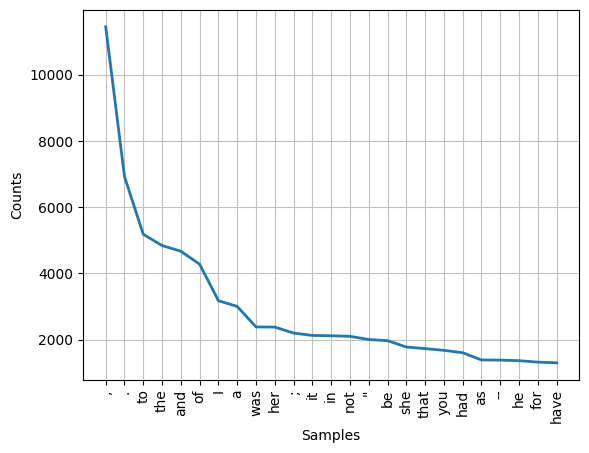

In [15]:
import nltk
nltk.download('gutenberg')
nltk.download('webtext')
from nltk.probability import FreqDist

# Utilisation du corpus gutenberg (Emma de Jane Austen)
nltk.download('gutenberg')
words = nltk.corpus.gutenberg.words('austen-emma.txt')

# Distribution de fréquence
data_analysis = FreqDist(words)

# Mots avec fréquence > 3
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])

print("Nombre de mots total:", len(words))
print("Nombre de mots uniques:", len(data_analysis))

# Afficher les 10 mots les plus fréquents (de plus de 3 lettres)
# Note: On trie le dictionnaire filtré pour l'affichage
sorted_filter_words = sorted(filter_words.items(), key=lambda x: x[1], reverse=True)
print("Top 10 mots fréquents (> 3 lettres):", sorted_filter_words[:10])

# Visualisation
data_analysis.plot(25, cumulative=False)

### Loi de Zipf :
On observe souvent que quelques mots sont très fréquents (la tête de la distribution) et beaucoup de mots sont rares (la longue traîne).
Ici, l'analyse sur *Emma* de Jane Austen montre les mots caractéristiques une fois les mots trop courts filtrés.


### Impact des Stopwords sur la Fréquence :
Comparons les mots les plus fréquents avec et sans stopwords.


Top 10 SANS stopwords: [('Mr', 1153), ('Emma', 865), ('could', 825), ('would', 815), ('Mrs', 699), ('Miss', 592), ('must', 564), ('Harriet', 506), ('said', 484), ('much', 478)]


<Axes: title={'center': 'Fréquence mots (sans stopwords)'}, xlabel='Samples', ylabel='Counts'>

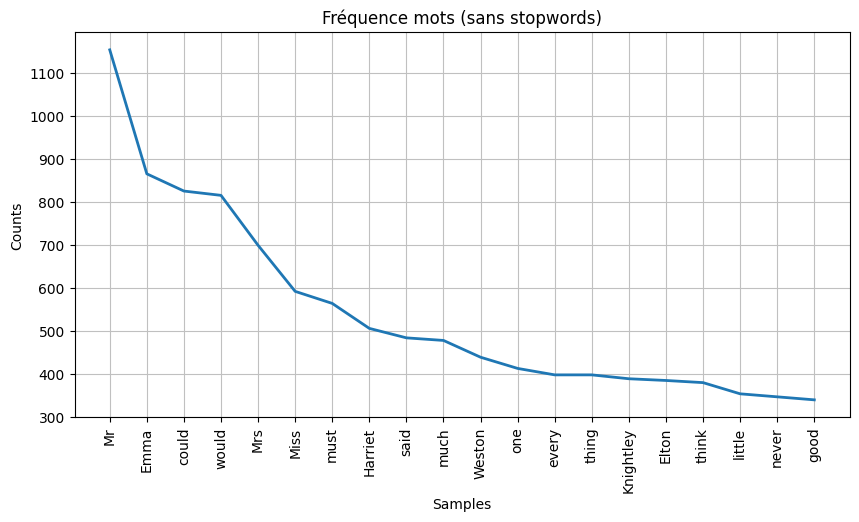

In [16]:
import matplotlib.pyplot as plt
# Distribution sans stopwords
stop_words = set(stopwords.words('english'))
words_no_sw = [w for w in words if w.lower() not in stop_words and w.isalpha()]

fdist_no_sw = FreqDist(words_no_sw)
print("Top 10 SANS stopwords:", fdist_no_sw.most_common(10))

# Visualisation Comparée
plt.figure(figsize=(10, 5))
fdist_no_sw.plot(20, title="Fréquence mots (sans stopwords)")